In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
lons = np.array(others.variables['lon'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [4]:
z_test_tsne_track_31_sam = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/latent_space/UM/Big_SAM_Interp_For_UM_3D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_sam_origin = np.load('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/latent_space/UM/Big_SPCAM_Interp_For_UM_3D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_IFS = np.load('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/latent_space/UM/Big_IFS_Interp_For_UM_3D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_NICAM = np.load('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/latent_space/UM/Big_NICAM_Interp_For_UM_3D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_SHIELD = np.load('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/latent_space/UM/Big_SHIELD_Interp_For_UM_3D_PCA_Latent_Space__4503.npy')
z_test_tsne_track_31_ICON = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/latent_space/UM/Big_ICON_Interp_For_UM_3D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_ARPEGE = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/latent_space/UM/Big_ARPEGE_Interp_For_UM_3D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_GEM = np.load('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/latent_space/UM/Big_GEM_Interp_For_UM_3D_PCA_Latent_Space__4503.npy')
z_test_tsne_track_31_UM = np.load('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Small_UM_3D_PCA_Latent_Space__4503.npy')

# Land Fraction

In [5]:
path = '/DFS-L/DATA/pritchard/gmooers/Raw_Data_Storage/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h0.2008-11.nc'
next_ds = xr.open_dataset(path)

#land fraction
land_frac = next_ds.LANDFRAC
land_frac = xr.DataArray.squeeze(land_frac).values

trop_land = land_frac[37:59, :]

In [6]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Raw_Data_Storage/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc'
extra_variables = xr.open_dataset(path_to_file)
latitudes = np.squeeze(extra_variables.LAT_20s_to_20n.values)
longitudes = np.squeeze(extra_variables.LON_0e_to_360e.values)

lat_keys_spcam = np.arange(0,22,1)
lat_values_spcam = latitudes
lon_keys_spcam = np.arange(0,144,1)
lon_values_spcam = longitudes

lat_dic_spcam = dict(zip(lat_values_spcam, lat_keys_spcam))
lon_dic_spcam = dict(zip(lon_values_spcam, lon_keys_spcam))

In [7]:
lat_test_spcam = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/SAM_ORIGIN/Small_Unscaled_MY_SAM_Lat_Test.npy')
lon_test_spcam  = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/SAM_ORIGIN/Small_Unscaled_MY_SAM_Lon_Test.npy')

lat_test_ifs = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/IFS/Raw_Small_Unscaled_IFS_Lat_Test.npy')
lon_test_ifs  = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/IFS/Raw_Small_Unscaled_IFS_Lon_Test.npy')

lat_test_nicam = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/NICAM/Raw_Small_Unscaled_NICAM_Lat_Test.npy')
lon_test_nicam  = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/NICAM/Raw_Small_Unscaled_NICAM_Lon_Test.npy')

lat_test_um = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/UM/Raw_Small_Unscaled_UM_Lat_Test.npy')
lon_test_um  = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/UM/Raw_Small_Unscaled_UM_Lon_Test.npy')

lat_test_shield = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/SHIELD/Raw_Small_Unscaled_SHIELD_Lat_Test.npy')*180/math.pi
lon_test_shield  = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/SHIELD/Raw_Small_Unscaled_SHIELD_Lon_Test.npy')*180/math.pi

lat_test_icon = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/ICON/Raw_Small_Unscaled_ICON_Lat_Test.npy')
lon_test_icon  = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/ICON/Raw_Small_Unscaled_ICON_Lon_Test.npy')

lat_test_arpege = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/ARPEGE/Raw_Small_Unscaled_ARPEGE_Lat_Test.npy')
lon_test_arpege  = np.load('/DFS-L/DATA/pritchard/gmooers/Finished_DYAMOND/DYAMOND/ARPEGE/Raw_Small_Unscaled_ARPEGE_Lon_Test.npy')

lat_test_gem = np.load('/fast/gmooers/Preprocessed_Data/DYAMOND/GEM/Raw_Small_Unscaled_GEM_Lat_Test.npy')
lon_test_gem  = np.load('/fast/gmooers/Preprocessed_Data/DYAMOND/GEM/Raw_Small_Unscaled_GEM_Lon_Test.npy')

lat_test_sam = np.load('/fast/gmooers/Preprocessed_Data/DYAMOND/SAM_IMPROVED/Raw_Small_Unscaled_SAM_Lat_Test.npy')
lon_test_sam  = np.load('/fast/gmooers/Preprocessed_Data/DYAMOND/SAM_IMPROVED/Raw_Small_Unscaled_SAM_Lon_Test.npy')


In [8]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/DYAMOND/Winter-SHIELD-3K/*'
extra_variables = xr.open_mfdataset(path_to_file)

w_velocity = xr.DataArray.squeeze(extra_variables.wa)
lons = xr.DataArray.squeeze(extra_variables.grid_xt)
lats = xr.DataArray.squeeze(extra_variables.grid_yt)

In [9]:
spcam_land_frac = np.empty(shape=(len(z_test_tsne_track_31_sam_origin)))
sam_land_frac = np.empty(shape=(len(z_test_tsne_track_31_sam)))
ifs_land_frac = np.empty(shape=(len(z_test_tsne_track_31_IFS)))
nicam_land_frac = np.empty(shape=(len(z_test_tsne_track_31_NICAM)))
um_land_frac = np.empty(shape=(len(z_test_tsne_track_31_UM)))
icon_land_frac = np.empty(shape=(len(z_test_tsne_track_31_ICON)))
arpege_land_frac = np.empty(shape=(len(z_test_tsne_track_31_ARPEGE)))

for i in range(len(spcam_land_frac)):
    spcam_land_frac[i] = trop_land[lat_dic_spcam[lat_test_spcam[i]],lon_dic_spcam[lon_test_spcam[i]]]

for i in range(len(sam_land_frac)):
    lat = latitudes.flat[np.abs(latitudes - lat_test_sam[i]).argmin()]
    lon = longitudes.flat[np.abs(longitudes - (lon_test_sam[i]+180.)).argmin()]
    if lon_dic_spcam[lon] <= 71:
        sam_land_frac[i] = trop_land[lat_dic_spcam[lat],lon_dic_spcam[lon]+72]
    else:
        sam_land_frac[i] = trop_land[lat_dic_spcam[lat],72-(144-lon_dic_spcam[lon])]
        
for i in range(len(ifs_land_frac)):
    lat = latitudes.flat[np.abs(latitudes - lat_test_ifs[i]).argmin()]
    lon = longitudes.flat[np.abs(longitudes - (lon_test_ifs[i]+180.)).argmin()]
    if lon_dic_spcam[lon] <= 71:
        ifs_land_frac[i] = trop_land[lat_dic_spcam[lat],lon_dic_spcam[lon]+72]
    else:
        ifs_land_frac[i] = trop_land[lat_dic_spcam[lat],72-(144-lon_dic_spcam[lon])]  
        
for i in range(len(nicam_land_frac)):
    lat = latitudes.flat[np.abs(latitudes - lat_test_nicam[i]).argmin()]
    lon = longitudes.flat[np.abs(longitudes - (lon_test_nicam[i]+180.)).argmin()]
    if lon_dic_spcam[lon] <= 71:
        nicam_land_frac[i] = trop_land[lat_dic_spcam[lat],lon_dic_spcam[lon]+72]
    else:
        nicam_land_frac[i] = trop_land[lat_dic_spcam[lat],72-(144-lon_dic_spcam[lon])] 

for i in range(len(um_land_frac)):
    lat = latitudes.flat[np.abs(latitudes - lat_test_um[i]).argmin()]
    lon = longitudes.flat[np.abs(longitudes - (lon_test_um[i]+180.)).argmin()]
    if lon_dic_spcam[lon] <= 71:
        um_land_frac[i] = trop_land[lat_dic_spcam[lat],lon_dic_spcam[lon]+72]
    else:
        um_land_frac[i] = trop_land[lat_dic_spcam[lat],72-(144-lon_dic_spcam[lon])]  
        
for i in range(len(icon_land_frac)):
    lat = latitudes.flat[np.abs(latitudes - lat_test_icon[i]).argmin()]
    lon = longitudes.flat[np.abs(longitudes - (lon_test_icon[i]+180.)).argmin()]
    if lon_dic_spcam[lon] <= 71:
        icon_land_frac[i] = trop_land[lat_dic_spcam[lat],lon_dic_spcam[lon]+72]
    else:
        icon_land_frac[i] = trop_land[lat_dic_spcam[lat],72-(144-lon_dic_spcam[lon])] 
        
for i in range(len(arpege_land_frac)):
    lat = latitudes.flat[np.abs(latitudes - lat_test_arpege[i]).argmin()]
    lon = longitudes.flat[np.abs(longitudes - (lon_test_arpege[i]+180.)).argmin()]
    if lon_dic_spcam[lon] <= 71:
        arpege_land_frac[i] = trop_land[lat_dic_spcam[lat],lon_dic_spcam[lon]+72]
    else:
        arpege_land_frac[i] = trop_land[lat_dic_spcam[lat],72-(144-lon_dic_spcam[lon])] 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


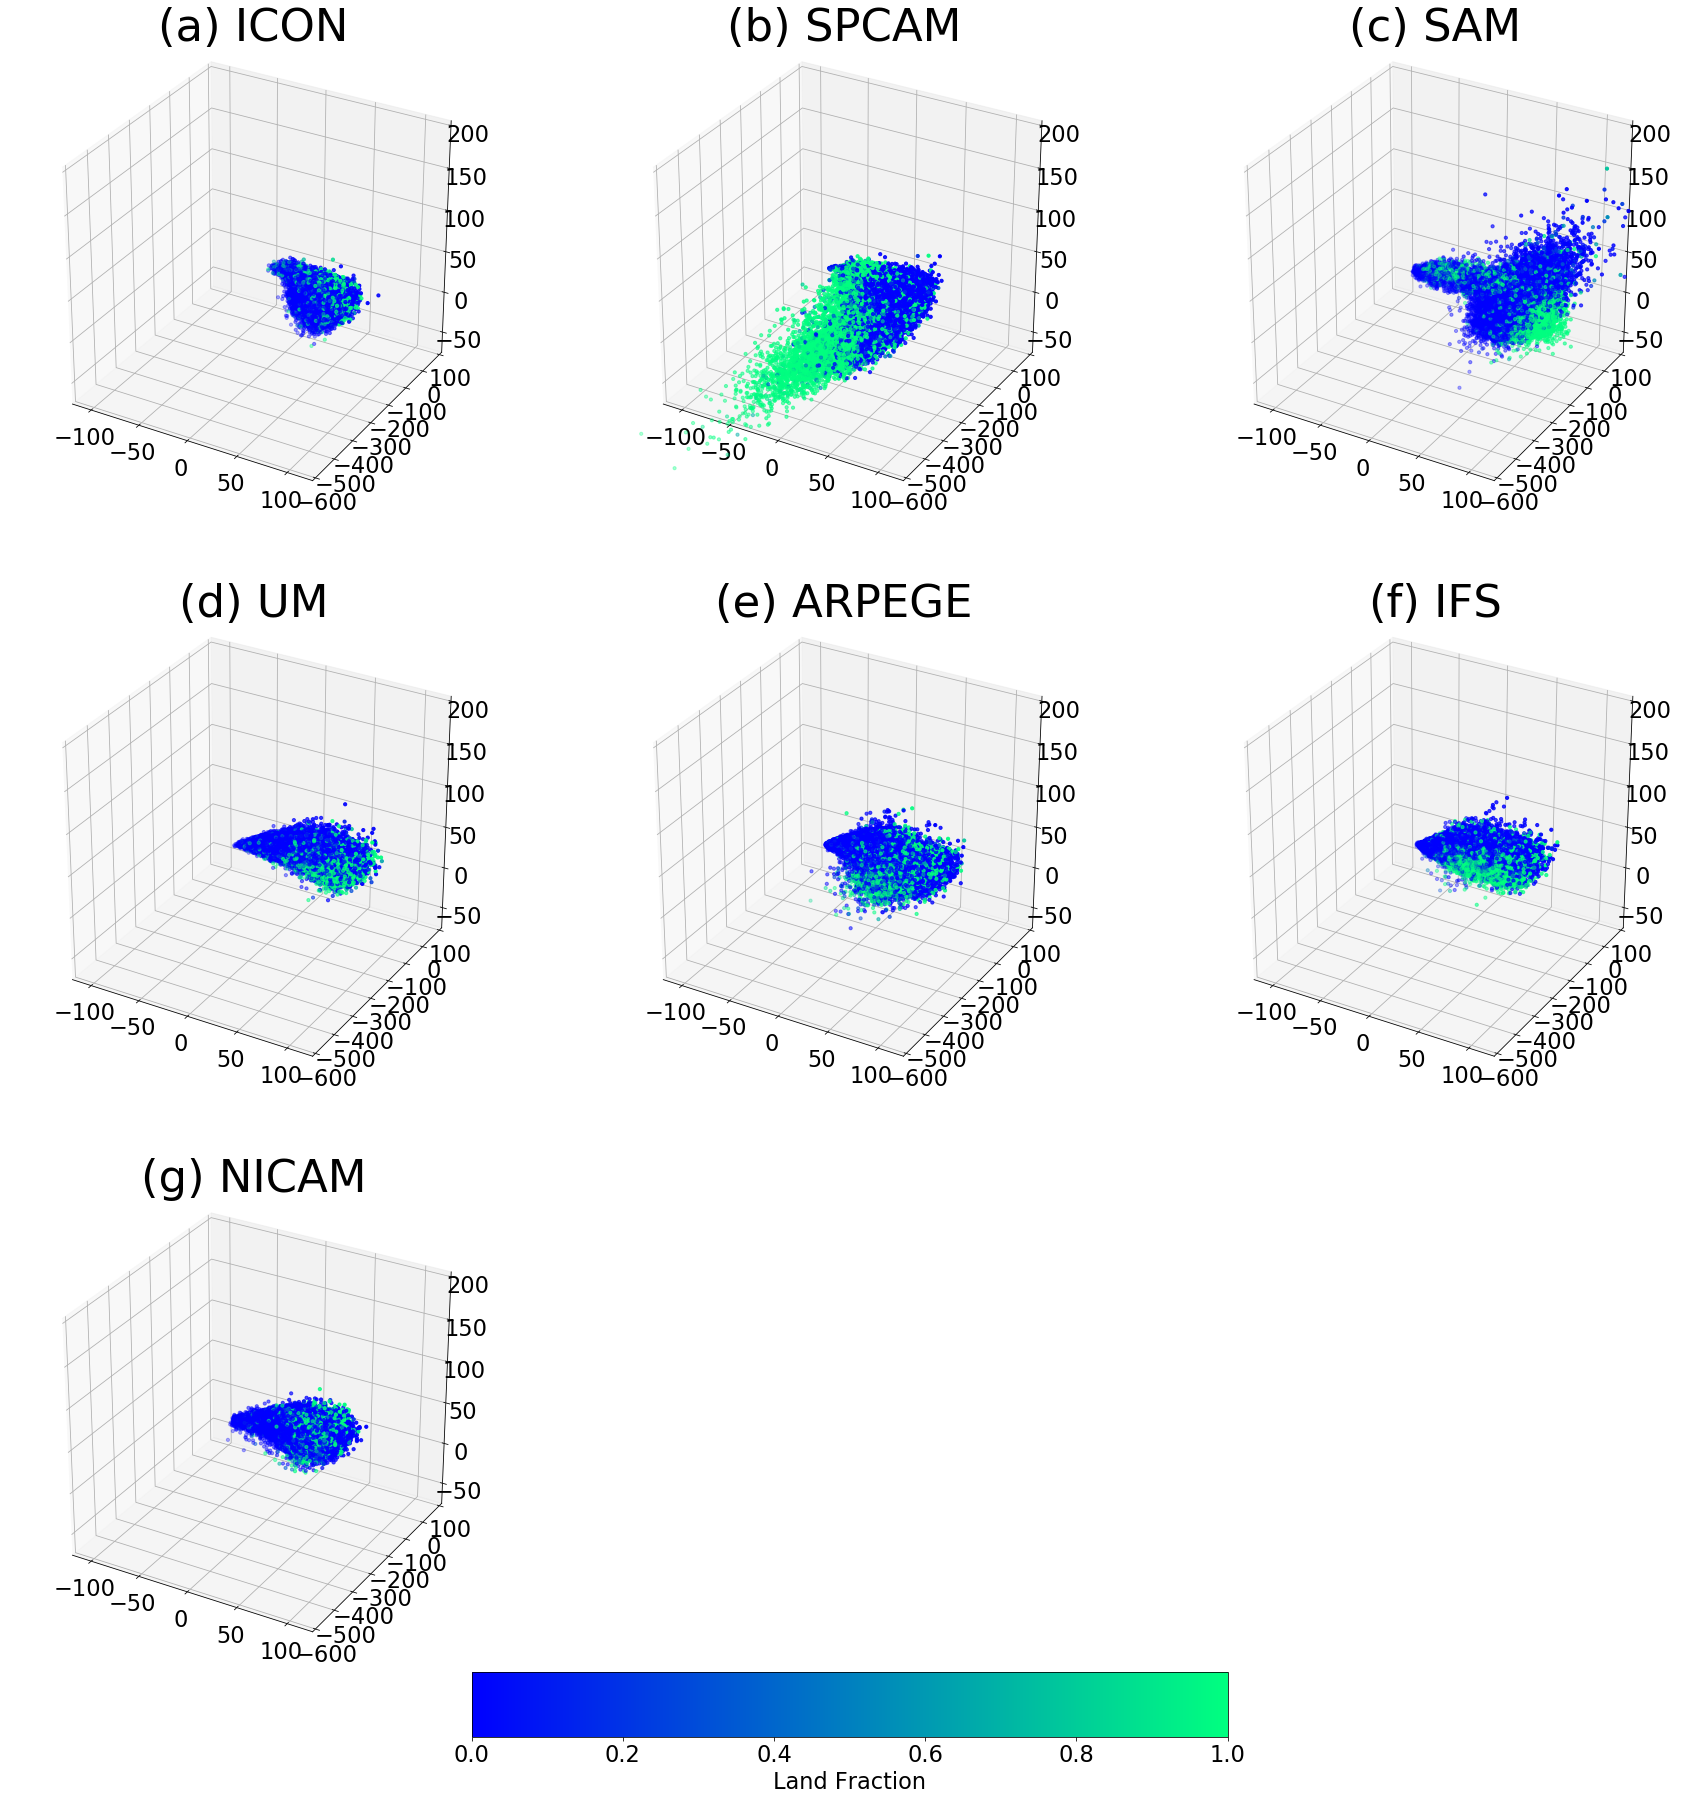

In [10]:
fig, ax = plt.subplots(3,3,figsize=(30,30))
gs=GridSpec(3,3)

vmin=0
vmax=1

ax1 = fig.add_subplot(gs[0,0], projection='3d')

cp = ax1.scatter(xs=z_test_tsne_track_31_ICON[:, 0], ys=z_test_tsne_track_31_ICON[:, 1], zs=z_test_tsne_track_31_ICON[:, 2],  c=icon_land_frac, cmap="winter", s=10.0, vmin=vmin, vmax=vmax)
ax1.set_title("(a) ICON", fontsize = fz*2.0, y = 1.05)

ax1.set_xlim(-115,120)
ax1.set_ylim(-600,100)
ax1.set_zlim(-70,200)

ax2 = fig.add_subplot(gs[0,1], projection='3d')

cp = ax2.scatter(xs=z_test_tsne_track_31_sam_origin[:, 0], ys=z_test_tsne_track_31_sam_origin[:, 1], zs=z_test_tsne_track_31_sam_origin[:, 2], c=spcam_land_frac, cmap="winter", s=10.0, vmin=vmin, vmax=vmax)
ax2.set_title("(b) SPCAM", fontsize = fz*2.0, y = 1.05)

ax2.set_xlim(-115,120)
ax2.set_ylim(-600,100)
ax2.set_zlim(-70,200)

ax3 = fig.add_subplot(gs[0,2], projection='3d')

cp = ax3.scatter(xs=z_test_tsne_track_31_sam[:, 0], ys=z_test_tsne_track_31_sam[:, 1], zs=z_test_tsne_track_31_sam[:, 2], c=sam_land_frac, cmap="winter", s=10.0, vmin=vmin, vmax=vmax)
ax3.set_title("(c) SAM", fontsize = fz*2.0, y = 1.05)

ax3.set_xlim(-115,120)
ax3.set_ylim(-600,100)
ax3.set_zlim(-70,200)

ax4 = fig.add_subplot(gs[1,0], projection='3d')

cp = ax4.scatter(xs=z_test_tsne_track_31_UM[:, 0], ys=z_test_tsne_track_31_UM[:, 1], zs=z_test_tsne_track_31_UM[:, 2], c=um_land_frac, cmap="winter", s=10.0, vmin=vmin, vmax=vmax)
ax4.set_title("(d) UM", fontsize = fz*2.0, y = 1.05)

ax4.set_xlim(-115,120)
ax4.set_ylim(-600,100)
ax4.set_zlim(-70,200)

ax5 = fig.add_subplot(gs[1,1], projection='3d')

cp = ax5.scatter(xs=z_test_tsne_track_31_ARPEGE[:, 0], ys=z_test_tsne_track_31_ARPEGE[:, 1], zs=z_test_tsne_track_31_ARPEGE[:, 2], c=arpege_land_frac, cmap="winter", s=10.0, vmin=vmin, vmax=vmax)
ax5.set_title("(e) ARPEGE", fontsize = fz*2.0, y = 1.05)

ax5.set_xlim(-115,120)
ax5.set_ylim(-600,100)
ax5.set_zlim(-70,200)

ax6 = fig.add_subplot(gs[1,2], projection='3d')

cp = ax6.scatter(xs=z_test_tsne_track_31_IFS[:, 0], ys=z_test_tsne_track_31_IFS[:, 1], zs=z_test_tsne_track_31_IFS[:, 2], c=ifs_land_frac, cmap="winter", s=10.0, vmin=vmin, vmax=vmax)
ax6.set_title("(f) IFS", fontsize = fz*2.0, y = 1.05)

ax6.set_xlim(-115,120)
ax6.set_ylim(-600,100)
ax6.set_zlim(-70,200)

ax7 = fig.add_subplot(gs[2,0], projection='3d')

cp = ax7.scatter(xs=z_test_tsne_track_31_NICAM[:, 0], ys=z_test_tsne_track_31_NICAM[:, 1], zs=z_test_tsne_track_31_NICAM[:, 2], c=nicam_land_frac, cmap="winter", s=10.0, vmin=vmin, vmax=vmax)
ax7.set_title("(g) NICAM", fontsize = fz*2.0, y = 1.05)

ax7.set_xlim(-115,120)
ax7.set_ylim(-600,100)
ax7.set_zlim(-70,200)

cbar_ax = fig.add_axes([0.34, 0.09, 0.35, 0.03])
cbar = fig.colorbar(cp, orientation='horizontal', cax=cbar_ax)
cbar.set_label('Land Fraction', fontsize=fz)

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,2])
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])
#plt.savefig("../Figures/Figure_S6.png", bbox_inches='tight',pad_inches = 0)

#for ii in range(360):
#    ax1.view_init(elev=30, azim=ii)
#    ax2.view_init(elev=30, azim=ii)
#    ax3.view_init(elev=30, azim=ii)
#    ax4.view_init(elev=30, azim=ii)
#    ax5.view_init(elev=30, azim=ii)
#    ax6.view_init(elev=30, azim=ii)
#    ax7.view_init(elev=30, azim=ii)
#    if ii < 10:
#        plt.savefig("../Png_Storage/Movie_S5/00"+str(ii)+".png")
#    if ii >= 10 and ii < 100:
#        plt.savefig("../Png_Storage/Movie_S5/0"+str(ii)+".png")
#    if ii >= 100:
#        plt.savefig("../Png_Storage/Movie_S5/"+str(ii)+".png")

# Convective Organization

In [11]:
EQ_1_ww_test_SAM_Origin_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_SAM_Origin_profile.npy")
EQ_1_ww_test_SAM_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_SAM_profile.npy")
EQ_1_ww_test_NICAM_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_NICAM_profile.npy")
EQ_1_ww_test_IFS_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_IFS_profile.npy")
EQ_1_ww_test_UM_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_UM_profile.npy")
EQ_1_ww_test_SHIELD_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_SHIELD_profile.npy")
EQ_1_ww_test_ICON_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_ICON_profile.npy")
EQ_1_ww_test_ARPEGE_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_ARPEGE_profile.npy")
EQ_1_ww_test_GEM_profile = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_EQ_1_ww_test_GEM_profile.npy")

Text(0.5, 0.95, 'UM Trained VAE 3D Latent Space Projections')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.


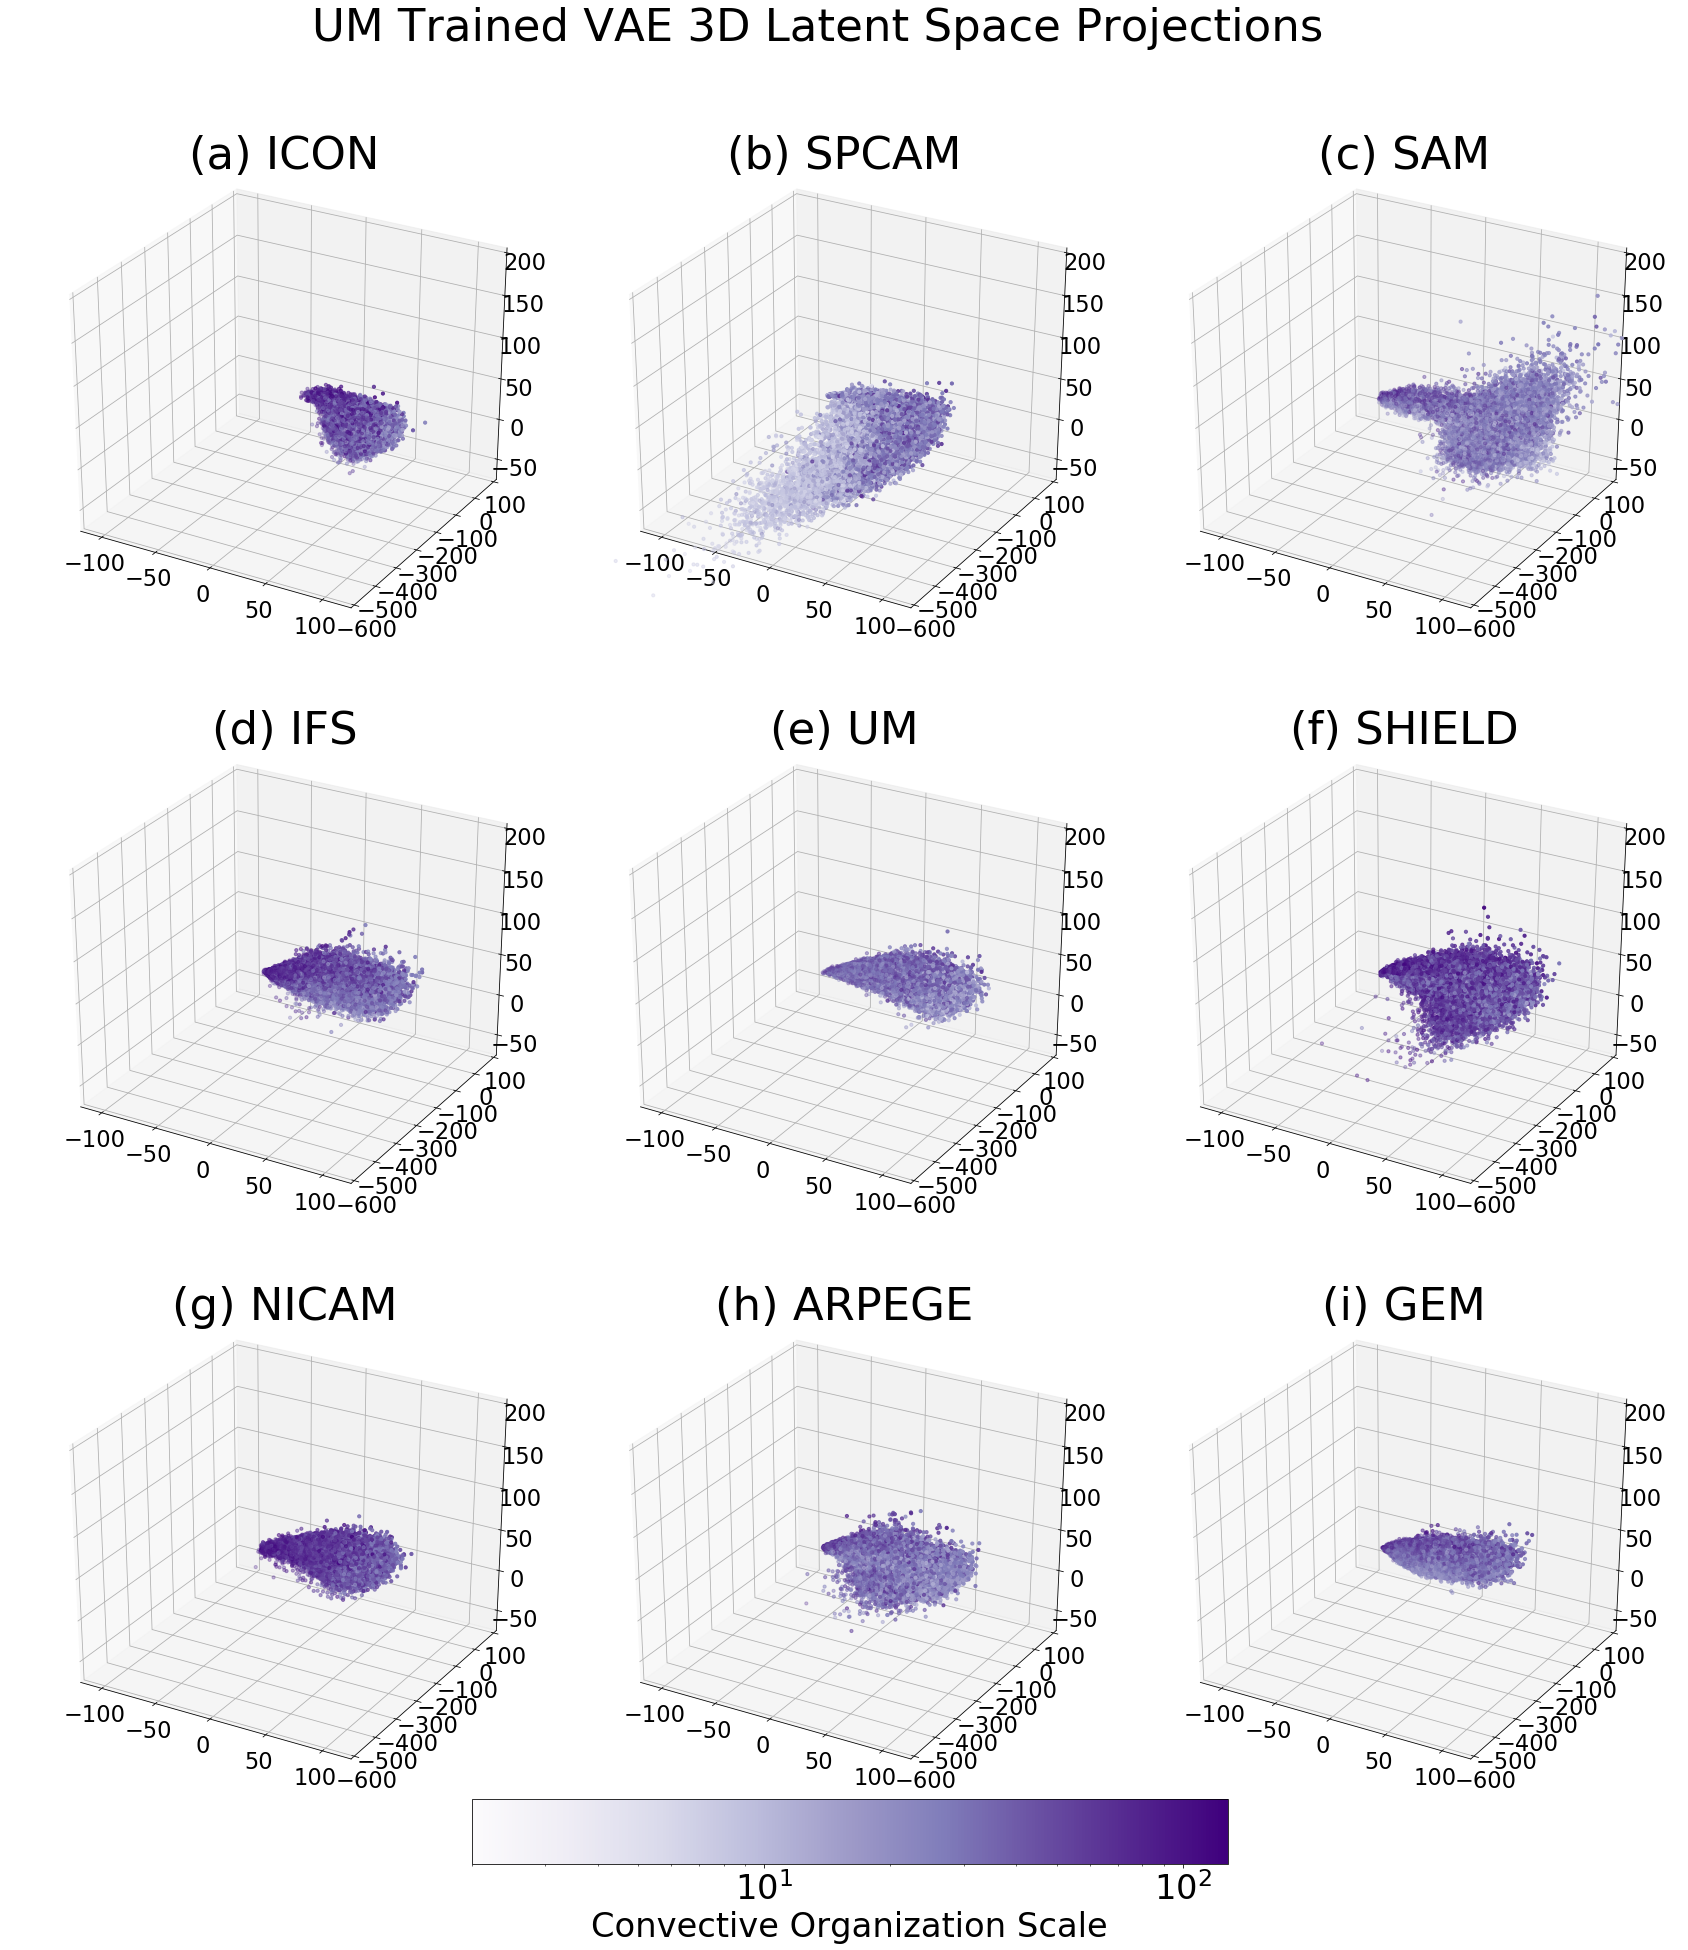

In [12]:
fig, ax = plt.subplots(3,3,figsize=(30,30))
gs=GridSpec(3,3)

ax1 = fig.add_subplot(gs[0,0], projection='3d')

cp = ax1.scatter(xs=z_test_tsne_track_31_ICON[:, 0], ys=z_test_tsne_track_31_ICON[:, 1], zs=z_test_tsne_track_31_ICON[:, 2],  c=EQ_1_ww_test_ICON_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax1.set_title("(a) ICON", fontsize = fz*2.0, y = 1.05)

ax1.set_xlim(-115,120)
ax1.set_ylim(-600,100)
ax1.set_zlim(-70,200)

ax2 = fig.add_subplot(gs[0,1], projection='3d')

cp = ax2.scatter(xs=z_test_tsne_track_31_sam_origin[:, 0], ys=z_test_tsne_track_31_sam_origin[:, 1], zs=z_test_tsne_track_31_sam_origin[:, 2], c=EQ_1_ww_test_SAM_Origin_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax2.set_title("(b) SPCAM", fontsize = fz*2.0, y = 1.05)

ax2.set_xlim(-115,120)
ax2.set_ylim(-600,100)
ax2.set_zlim(-70,200)

ax3 = fig.add_subplot(gs[0,2], projection='3d')

cp = ax3.scatter(xs=z_test_tsne_track_31_sam[:, 0], ys=z_test_tsne_track_31_sam[:, 1], zs=z_test_tsne_track_31_sam[:, 2], c=EQ_1_ww_test_SAM_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax3.set_title("(c) SAM", fontsize = fz*2.0, y = 1.05)

ax3.set_xlim(-115,120)
ax3.set_ylim(-600,100)
ax3.set_zlim(-70,200)

ax4 = fig.add_subplot(gs[1,0], projection='3d')

cp = ax4.scatter(xs=z_test_tsne_track_31_IFS[:, 0], ys=z_test_tsne_track_31_IFS[:, 1], zs=z_test_tsne_track_31_IFS[:, 2], c=EQ_1_ww_test_IFS_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax4.set_title("(d) IFS", fontsize = fz*2.0, y = 1.05)

ax4.set_xlim(-115,120)
ax4.set_ylim(-600,100)
ax4.set_zlim(-70,200)

ax5 = fig.add_subplot(gs[1,1], projection='3d')

cp = ax5.scatter(xs=z_test_tsne_track_31_UM[:, 0], ys=z_test_tsne_track_31_UM[:, 1], zs=z_test_tsne_track_31_UM[:, 2], c=EQ_1_ww_test_UM_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax5.set_title("(e) UM", fontsize = fz*2.0, y = 1.05)

ax5.set_xlim(-115,120)
ax5.set_ylim(-600,100)
ax5.set_zlim(-70,200)

ax6 = fig.add_subplot(gs[1,2], projection='3d')

cp = ax6.scatter(xs=z_test_tsne_track_31_SHIELD[:, 0], ys=z_test_tsne_track_31_SHIELD[:, 1], zs=z_test_tsne_track_31_SHIELD[:, 2], c=EQ_1_ww_test_SHIELD_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax6.set_title("(f) SHIELD", fontsize = fz*2.0, y = 1.05)

ax6.set_xlim(-115,120)
ax6.set_ylim(-600,100)
ax6.set_zlim(-70,200)

ax7 = fig.add_subplot(gs[2,0], projection='3d')

cp = ax7.scatter(xs=z_test_tsne_track_31_NICAM[:, 0], ys=z_test_tsne_track_31_NICAM[:, 1], zs=z_test_tsne_track_31_NICAM[:, 2], c=EQ_1_ww_test_NICAM_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax7.set_title("(g) NICAM", fontsize = fz*2.0, y = 1.05)

ax7.set_xlim(-115,120)
ax7.set_ylim(-600,100)
ax7.set_zlim(-70,200)

ax8 = fig.add_subplot(gs[2,1], projection='3d')

cp = ax8.scatter(xs=z_test_tsne_track_31_ARPEGE[:, 0], ys=z_test_tsne_track_31_ARPEGE[:, 1], zs=z_test_tsne_track_31_ARPEGE[:, 2], c=EQ_1_ww_test_ARPEGE_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax8.set_title("(h) ARPEGE", fontsize = fz*2.0, y = 1.05)

ax8.set_xlim(-115,120)
ax8.set_ylim(-600,100)
ax8.set_zlim(-70,200)

ax9 = fig.add_subplot(gs[2,2], projection='3d')

cp = ax9.scatter(xs=z_test_tsne_track_31_GEM[:, 0], ys=z_test_tsne_track_31_GEM[:, 1], zs=z_test_tsne_track_31_GEM[:, 2], c=EQ_1_ww_test_GEM_profile, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), vmin=2.0, vmax=128.0)
ax9.set_title("(i) GEM", fontsize = fz*2.0, y = 1.05)

ax9.set_xlim(-115,120)
ax9.set_ylim(-600,100)
ax9.set_zlim(-70,200)

cbar_ax = fig.add_axes([0.34, 0.09, 0.35, 0.03])
cbar = fig.colorbar(cp, orientation='horizontal', cax=cbar_ax)
cbar.set_label('Convective Organization Scale', fontsize=fz*1.5)

#ticklabs = cbar.ax.get_yticklabels()
#cbar.ax.set_yticklabels(ticklabs, fontsize=fz*1.5)
cbar.ax.tick_params(labelsize=fz*1.5)

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,2])
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

plt.subplots_adjust(wspace=0.01)

plt.suptitle("UM Trained VAE 3D Latent Space Projections", fontsize = fz*2.0, y = 0.95)

#plt.savefig("../Figures/Figure_S4.png", bbox_inches='tight',pad_inches = 0)

#for ii in range(360):
#    ax1.view_init(elev=30, azim=ii)
#    ax2.view_init(elev=30, azim=ii)
#    ax3.view_init(elev=30, azim=ii)
#    ax4.view_init(elev=30, azim=ii)
#    ax5.view_init(elev=30, azim=ii)
#    ax6.view_init(elev=30, azim=ii)
#    ax7.view_init(elev=30, azim=ii)
#    ax8.view_init(elev=30, azim=ii)
#    ax9.view_init(elev=30, azim=ii)
#    if ii < 10:
#        plt.savefig("../Png_Storage/Movie_S3/00"+str(ii)+".png")
#    if ii >= 10 and ii < 100:
#        plt.savefig("../Png_Storage/Movie_S3/0"+str(ii)+".png")
#    if ii >= 100:
#        plt.savefig("../Png_Storage/Movie_S3/"+str(ii)+".png")

# Intensity

In [13]:
tke_GEM = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_GEM.npy")
tke_SAM_Origin = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_SAM_Origin.npy")
tke_SAM = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_SAM.npy")
tke_NICAM = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_NICAM.npy")
tke_IFS = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_IFS.npy")
tke_UM = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_UM.npy")
tke_SHIELD = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_SHIELD.npy")
tke_ICON = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_ICON.npy")
tke_ARPEGE = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Labels/4802_tke_ARPEGE.npy")

Text(0.5, 0.95, 'UM Trained VAE 3D Latent Space Projections')

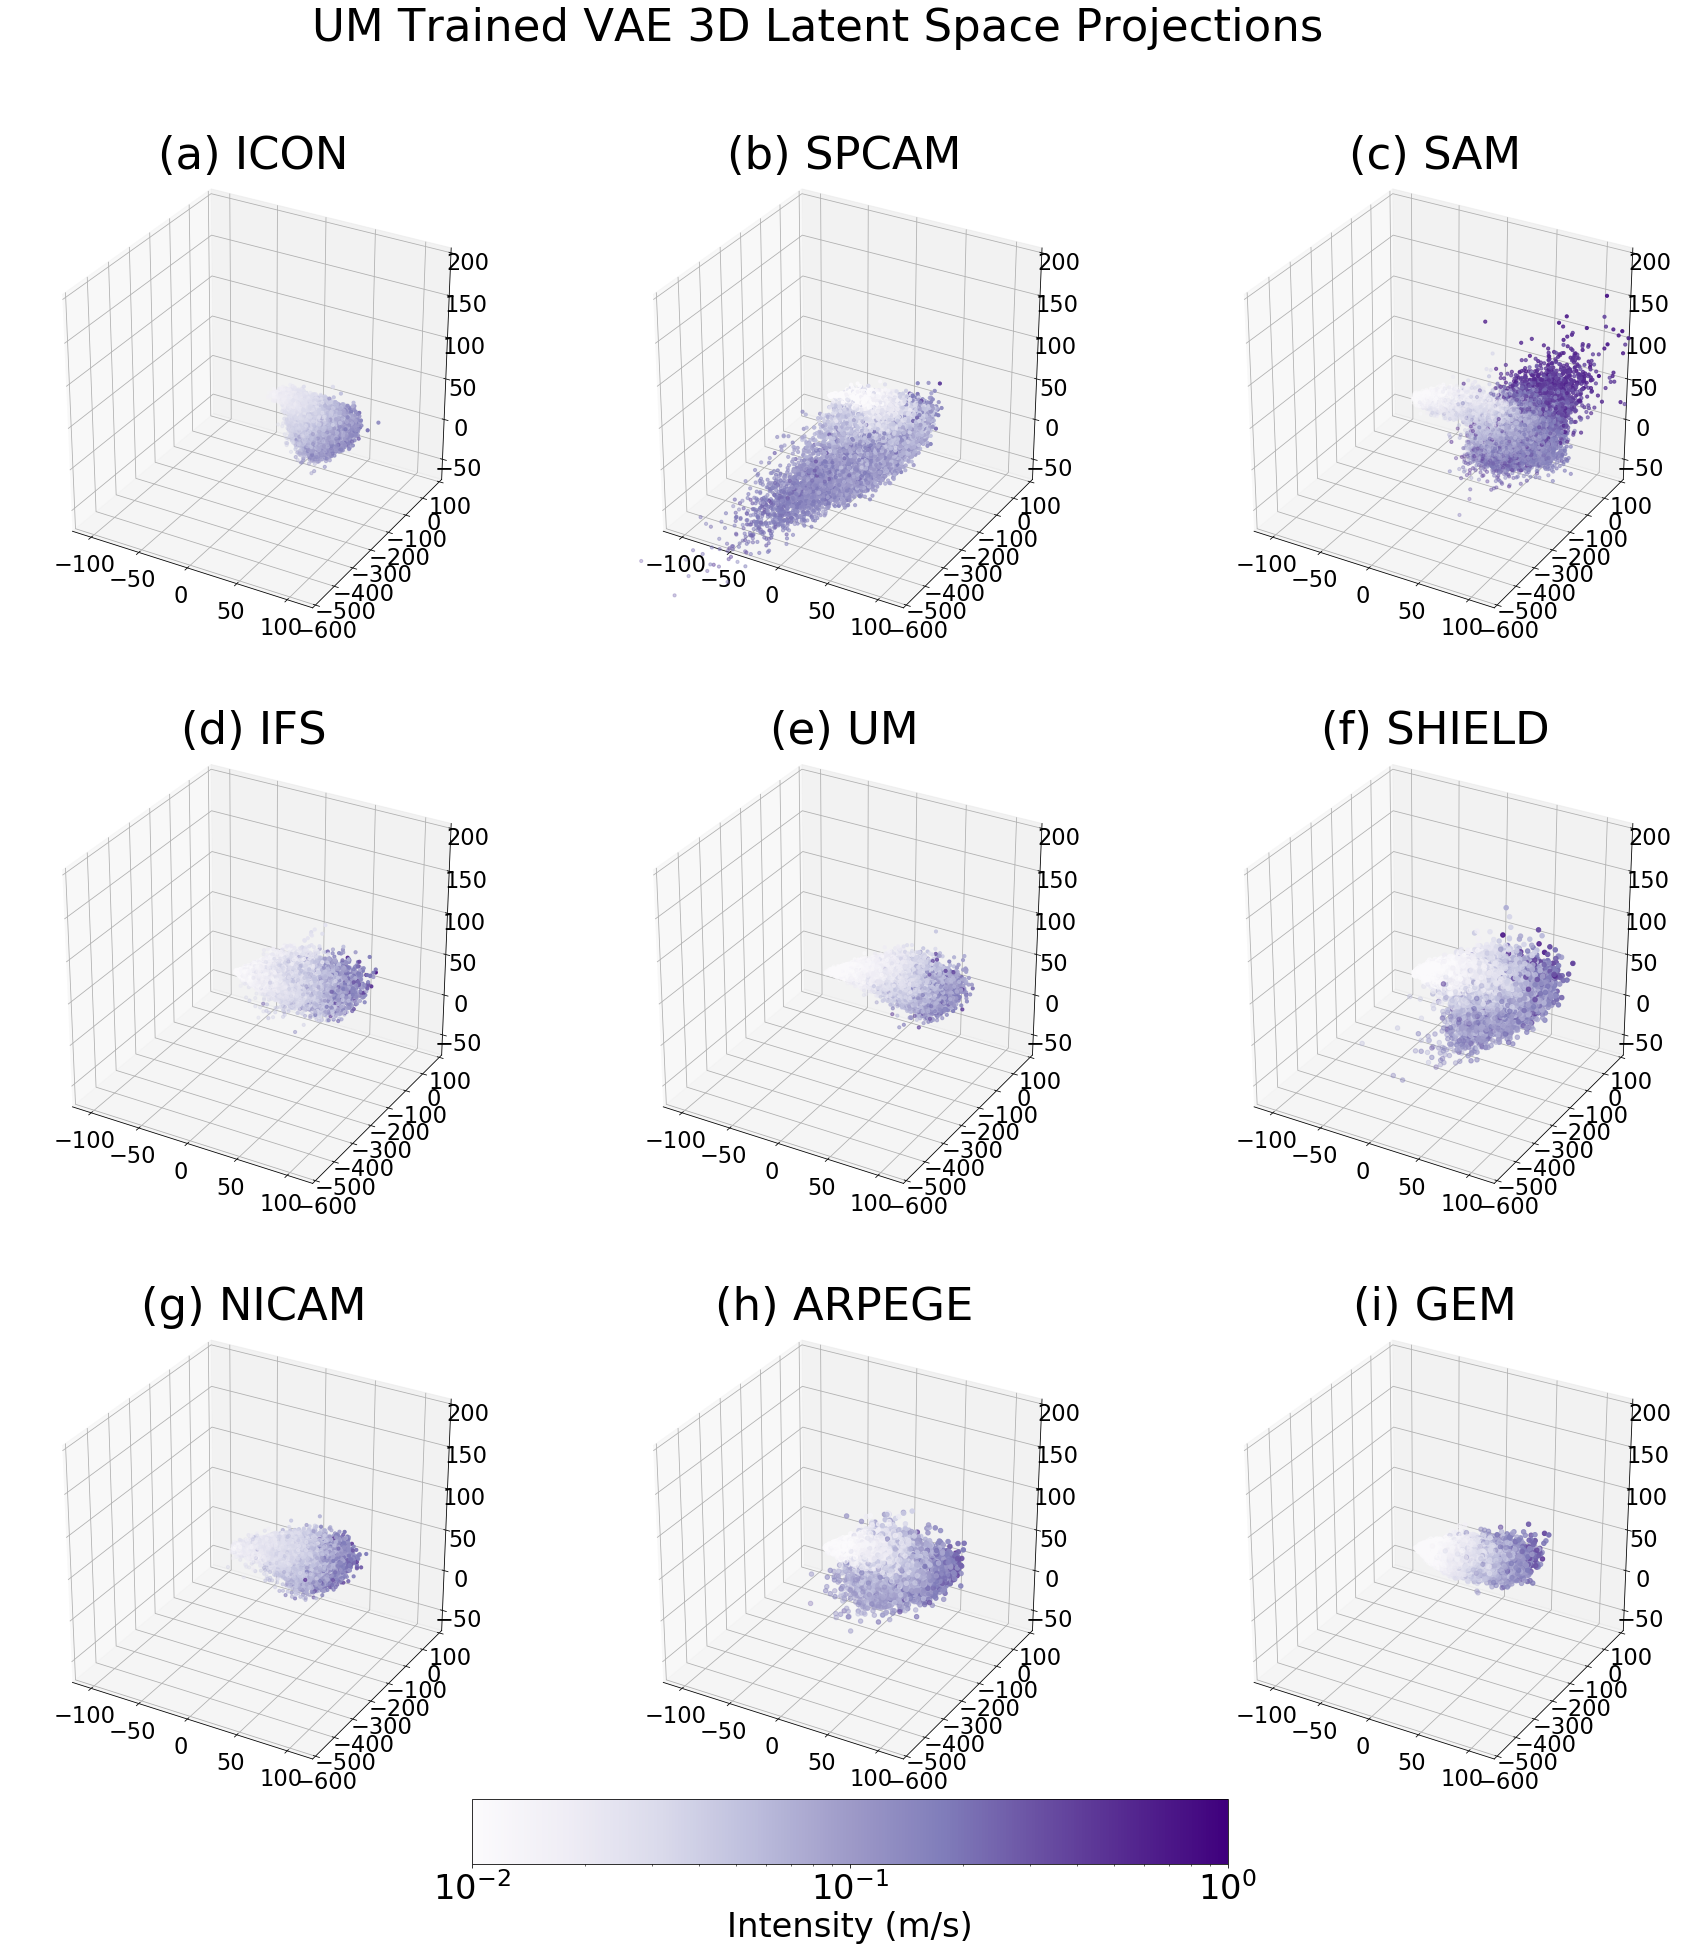

In [14]:
fig, ax = plt.subplots(3,3,figsize=(30,30))
gs=GridSpec(3,3)

vmin = 0.01
vmax = 1

ax1 = fig.add_subplot(gs[0,0], projection='3d')

cp = ax1.scatter(xs=z_test_tsne_track_31_ICON[:, 0], ys=z_test_tsne_track_31_ICON[:, 1], zs=z_test_tsne_track_31_ICON[:, 2],  c=tke_ICON, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax1.set_title("(a) ICON", fontsize = fz*2.0, y = 1.05)

ax1.set_xlim(-115,120)
ax1.set_ylim(-600,100)
ax1.set_zlim(-70,200)

ax2 = fig.add_subplot(gs[0,1], projection='3d')

cp = ax2.scatter(xs=z_test_tsne_track_31_sam_origin[:, 0], ys=z_test_tsne_track_31_sam_origin[:, 1], zs=z_test_tsne_track_31_sam_origin[:, 2], c=tke_SAM_Origin, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax2.set_title("(b) SPCAM", fontsize = fz*2.0, y = 1.05)

ax2.set_xlim(-115,120)
ax2.set_ylim(-600,100)
ax2.set_zlim(-70,200)

ax3 = fig.add_subplot(gs[0,2], projection='3d')

cp = ax3.scatter(xs=z_test_tsne_track_31_sam[:, 0], ys=z_test_tsne_track_31_sam[:, 1], zs=z_test_tsne_track_31_sam[:, 2],  c=tke_SAM, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax3.set_title("(c) SAM", fontsize = fz*2.0, y = 1.05)

ax3.set_xlim(-115,120)
ax3.set_ylim(-600,100)
ax3.set_zlim(-70,200)

ax4 = fig.add_subplot(gs[1,0], projection='3d')

cp = ax4.scatter(xs=z_test_tsne_track_31_IFS[:, 0], ys=z_test_tsne_track_31_IFS[:, 1], zs=z_test_tsne_track_31_IFS[:, 2], c=tke_IFS, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax4.set_title("(d) IFS", fontsize = fz*2.0, y = 1.05)

ax4.set_xlim(-115,120)
ax4.set_ylim(-600,100)
ax4.set_zlim(-70,200)

ax5 = fig.add_subplot(gs[1,1], projection='3d')

cp = ax5.scatter(xs=z_test_tsne_track_31_UM[:, 0], ys=z_test_tsne_track_31_UM[:, 1], zs=z_test_tsne_track_31_UM[:, 2],  c=tke_UM, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax5.set_title("(e) UM", fontsize = fz*2.0, y = 1.05)

ax5.set_xlim(-115,120)
ax5.set_ylim(-600,100)
ax5.set_zlim(-70,200)

ax6 = fig.add_subplot(gs[1,2], projection='3d')

cp = ax6.scatter(xs=z_test_tsne_track_31_SHIELD[:, 0], ys=z_test_tsne_track_31_SHIELD[:, 1], zs=z_test_tsne_track_31_SHIELD[:, 2], c=tke_SHIELD, cmap="Purples", vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax6.set_title("(f) SHIELD", fontsize = fz*2.0, y = 1.05)

ax6.set_xlim(-115,120)
ax6.set_ylim(-600,100)
ax6.set_zlim(-70,200)

ax7 = fig.add_subplot(gs[2,0], projection='3d')

cp = ax7.scatter(xs=z_test_tsne_track_31_NICAM[:, 0], ys=z_test_tsne_track_31_NICAM[:, 1], zs=z_test_tsne_track_31_NICAM[:, 2], c=tke_NICAM, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax7.set_title("(g) NICAM", fontsize = fz*2.0, y = 1.05)

ax7.set_xlim(-115,120)
ax7.set_ylim(-600,100)
ax7.set_zlim(-70,200)

ax8 = fig.add_subplot(gs[2,1], projection='3d')

cp = ax8.scatter(xs=z_test_tsne_track_31_ARPEGE[:, 0], ys=z_test_tsne_track_31_ARPEGE[:, 1], zs=z_test_tsne_track_31_ARPEGE[:, 2], c=tke_ARPEGE, cmap="Purples", vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax8.set_title("(h) ARPEGE", fontsize = fz*2.0, y = 1.05)

ax8.set_xlim(-115,120)
ax8.set_ylim(-600,100)
ax8.set_zlim(-70,200)

ax9 = fig.add_subplot(gs[2,2], projection='3d')

cp = ax9.scatter(xs=z_test_tsne_track_31_GEM[:, 0], ys=z_test_tsne_track_31_GEM[:, 1], zs=z_test_tsne_track_31_GEM[:, 2], c=tke_GEM, cmap="Purples", vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax9.set_title("(i) GEM", fontsize = fz*2.0, y = 1.05)

ax9.set_xlim(-115,120)
ax9.set_ylim(-600,100)
ax9.set_zlim(-70,200)

cbar_ax = fig.add_axes([0.34, 0.09, 0.35, 0.03])
cbar = fig.colorbar(cp, orientation='horizontal', cax=cbar_ax)
cbar.set_label('Intensity (m/s)', fontsize=fz*1.5)
cbar.ax.tick_params(labelsize=fz*1.5)

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,2])
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

plt.suptitle("UM Trained VAE 3D Latent Space Projections", fontsize = fz*2.0, y = 0.95)
#plt.savefig("../Figures/Figure_S5.png", bbox_inches='tight',pad_inches = 0)



#for ii in range(360):
#    ax1.view_init(elev=30, azim=ii)
#    ax2.view_init(elev=30, azim=ii)
#    ax3.view_init(elev=30, azim=ii)
#    ax4.view_init(elev=30, azim=ii)
#    ax5.view_init(elev=30, azim=ii)
#    ax6.view_init(elev=30, azim=ii)
#    ax7.view_init(elev=30, azim=ii)
#    ax8.view_init(elev=30, azim=ii)
#    ax9.view_init(elev=30, azim=ii)
#    if ii < 10:
#        plt.savefig("../Png_Storage/Movie_S4/00"+str(ii)+".png")
#    if ii >= 10 and ii < 100:
#        plt.savefig("../Png_Storage/Movie_S4/0"+str(ii)+".png")
#    if ii >= 100:
#        plt.savefig("../Png_Storage/Movie_S4/"+str(ii)+".png")

# Cluster (Method 2 -- only do reassignments)

In [15]:
# scaled, saved centers
labels_3_original = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Scaled_Mandt_Method_Small_SPCAM_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_SAM = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Scaled_Mandt_Method_Small_SAM_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_UM = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Small_UM_Labels_4503_Z_3.npy").astype(int)
labels_3_SHIELD = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Scaled_Mandt_Method_Small_SHIELD_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_ICON = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Scaled_Mandt_Method_Small_ICON_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_ARPEGE = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Scaled_Mandt_Method_Small_ARPEGE_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_NICAM = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Scaled_Mandt_Method_Small_NICAM_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_GEM = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Scaled_Mandt_Method_Small_GEM_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_IFS = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/Scaled_Mandt_Method_Small_IFS_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)

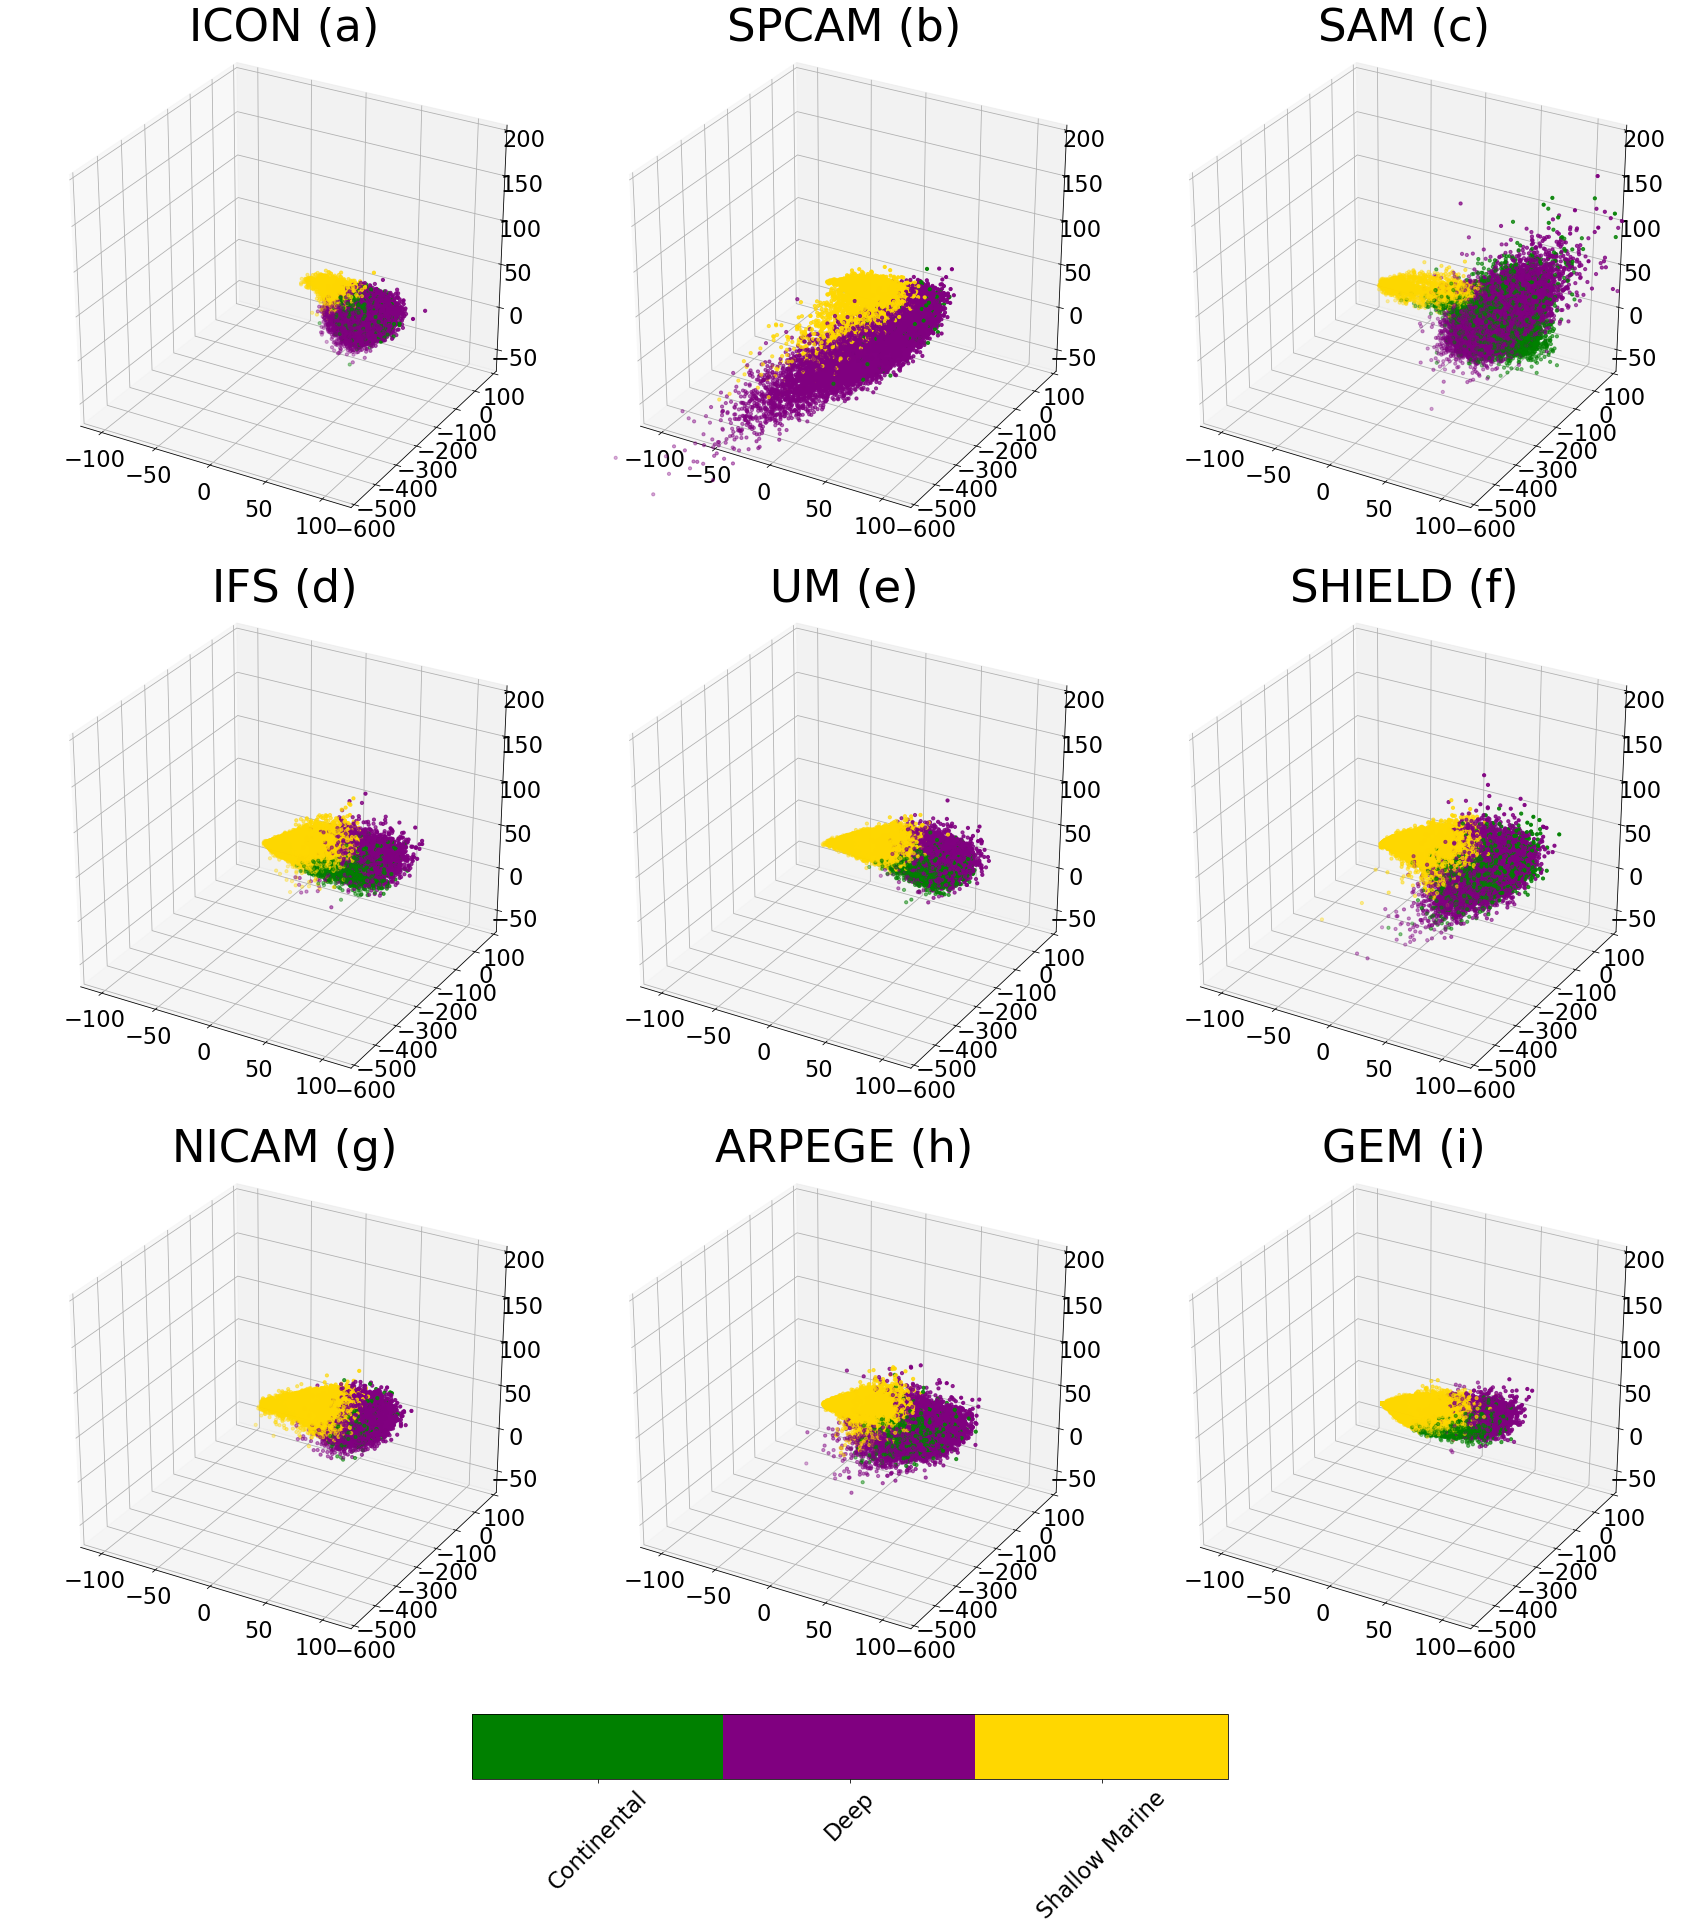

In [16]:
fig, ax = plt.subplots(3,3,figsize=(30,30))
gs=GridSpec(3,3)
cmap = matplotlib.colors.ListedColormap(["green","purple","gold"])

ax1=fig.add_subplot(gs[0,0], projection='3d')

cp = ax1.scatter(xs=z_test_tsne_track_31_ICON[:, 0], ys=z_test_tsne_track_31_ICON[:, 1], zs=z_test_tsne_track_31_ICON[:, 2], c=labels_3_ICON, cmap=cmap, s=10.0)
ax1.set_title("ICON (a)", fontsize = fz*2, y = 1.05)

ax1.set_xlim(-115,120)
ax1.set_ylim(-600,100)
ax1.set_zlim(-70,200)

ax2=fig.add_subplot(gs[0,1], projection='3d')

cp = ax2.scatter(xs=z_test_tsne_track_31_sam_origin[:, 0], ys=z_test_tsne_track_31_sam_origin[:, 1], zs=z_test_tsne_track_31_sam_origin[:, 2], c=labels_3_original, cmap=cmap, s=10.0)
ax2.set_title("SPCAM (b)", fontsize = fz*2, y = 1.05)

ax2.set_xlim(-115,120)
ax2.set_ylim(-600,100)
ax2.set_zlim(-70,200)

ax3=fig.add_subplot(gs[0,2], projection='3d')

cp = ax3.scatter(xs=z_test_tsne_track_31_sam[:, 0], ys=z_test_tsne_track_31_sam[:, 1], zs=z_test_tsne_track_31_sam[:, 2], c=labels_3_SAM, cmap=cmap, s=10.0)
ax3.set_title("SAM (c)", fontsize = fz*2, y = 1.05)

ax3.set_xlim(-115,120)
ax3.set_ylim(-600,100)
ax3.set_zlim(-70,200)

ax4=fig.add_subplot(gs[1,0], projection='3d')

cp = ax4.scatter(xs=z_test_tsne_track_31_IFS[:, 0], ys=z_test_tsne_track_31_IFS[:, 1], zs=z_test_tsne_track_31_IFS[:, 2], c=labels_3_IFS, cmap=cmap, s=10.0)
ax4.set_title("IFS (d)", fontsize = fz*2, y = 1.05)

ax4.set_xlim(-115,120)
ax4.set_ylim(-600,100)
ax4.set_zlim(-70,200)

ax5=fig.add_subplot(gs[1,1], projection='3d')

cp = ax5.scatter(xs=z_test_tsne_track_31_UM[:, 0], ys=z_test_tsne_track_31_UM[:, 1], zs=z_test_tsne_track_31_UM[:, 2], c=labels_3_UM, cmap=cmap, s=10.0)
ax5.set_title("UM (e)", fontsize = fz*2, y = 1.05)

ax5.set_xlim(-115,120)
ax5.set_ylim(-600,100)
ax5.set_zlim(-70,200)

ax6=fig.add_subplot(gs[1,2], projection='3d')

cp = ax6.scatter(xs=z_test_tsne_track_31_SHIELD[:, 0], ys=z_test_tsne_track_31_SHIELD[:, 1], zs=z_test_tsne_track_31_SHIELD[:, 2], c=labels_3_SHIELD, cmap=cmap, s=10.0)
ax6.set_title("SHIELD (f)", fontsize = fz*2, y = 1.05)

ax6.set_xlim(-115,120)
ax6.set_ylim(-600,100)
ax6.set_zlim(-70,200)

ax7=fig.add_subplot(gs[2,0], projection='3d')

cp = ax7.scatter(xs=z_test_tsne_track_31_NICAM[:, 0], ys=z_test_tsne_track_31_NICAM[:, 1], zs=z_test_tsne_track_31_NICAM[:, 2], c=labels_3_NICAM, cmap=cmap, s=10.0)
ax7.set_title("NICAM (g)", fontsize = fz*2, y = 1.05)

ax7.set_xlim(-115,120)
ax7.set_ylim(-600,100)
ax7.set_zlim(-70,200)

ax8=fig.add_subplot(gs[2,1], projection='3d')

cp = ax8.scatter(xs=z_test_tsne_track_31_ARPEGE[:, 0], ys=z_test_tsne_track_31_ARPEGE[:, 1], zs=z_test_tsne_track_31_ARPEGE[:, 2], c=labels_3_ARPEGE, cmap=cmap, s=10.0)
ax8.set_title("ARPEGE (h)", fontsize = fz*2, y = 1.05)

ax8.set_xlim(-115,120)
ax8.set_ylim(-600,100)
ax8.set_zlim(-70,200)

ax9=fig.add_subplot(gs[2,2], projection='3d')

cp = ax9.scatter(xs=z_test_tsne_track_31_GEM[:, 0], ys=z_test_tsne_track_31_GEM[:, 1], zs=z_test_tsne_track_31_GEM[:, 2], c=labels_3_GEM, cmap=cmap, s=10.0)
ax9.set_title("GEM (i)", fontsize = fz*2, y = 1.05)

ax9.set_xlim(-115,120)
ax9.set_ylim(-600,100)
ax9.set_zlim(-70,200)

cbar_ax = fig.add_axes([0.34, 0.07, 0.35, 0.03])
cbar = fig.colorbar(cp, orientation='horizontal', cax=cbar_ax)

n_clusters=3
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cbar.set_ticks(tick_locs)

cbar.ax.set_xticklabels(["Continental","Deep","Shallow Marine"], fontsize=fz, rotation=45)

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,2])
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

plt.subplots_adjust(wspace=0.01, hspace=0.1)

#for ii in range(360):
#    ax1.view_init(elev=30, azim=ii)
#    ax2.view_init(elev=30, azim=ii)
#    ax3.view_init(elev=30, azim=ii)
#    ax4.view_init(elev=30, azim=ii)
#    ax5.view_init(elev=30, azim=ii)
#    ax6.view_init(elev=30, azim=ii)
#    ax7.view_init(elev=30, azim=ii)
#    ax8.view_init(elev=30, azim=ii)
#    ax9.view_init(elev=30, azim=ii)
#    if ii < 10:
#        plt.savefig("../Png_Storage/Movie_S2/00"+str(ii)+".png")
#    if ii >= 10 and ii < 100:
#        plt.savefig("../Png_Storage/Movie_S2/0"+str(ii)+".png")
#    if ii >= 100:
#        plt.savefig("../Png_Storage/Movie_S2/"+str(ii)+".png")

In [17]:
import seaborn as sns

In [19]:
label_list = ["SAM","SPCAM","ICON","NICAM","UM","SHIELD","IFS","ARPEGE","GEM"]
results = np.empty(shape=(len(label_list),3))
labels_all = [labels_3_SAM,labels_3_original,labels_3_ICON,labels_3_NICAM,labels_3_UM,labels_3_SHIELD,labels_3_IFS,labels_3_ARPEGE,labels_3_GEM]
for i in range(len(label_list)):
    results[i,:] = np.array([np.bincount(labels_all[i])[0]/len(labels_all[i])*100.,np.bincount(labels_all[i])[1]/len(labels_all[i])*100.,np.bincount(labels_all[i])[2]/len(labels_all[i])*100.])

In [20]:
for i in range(len(results)):
    for j in range(len(results[i])):
        results[i,j] = np.format_float_positional(results[i,j], precision=4, unique=False, fractional=False, trim='k')

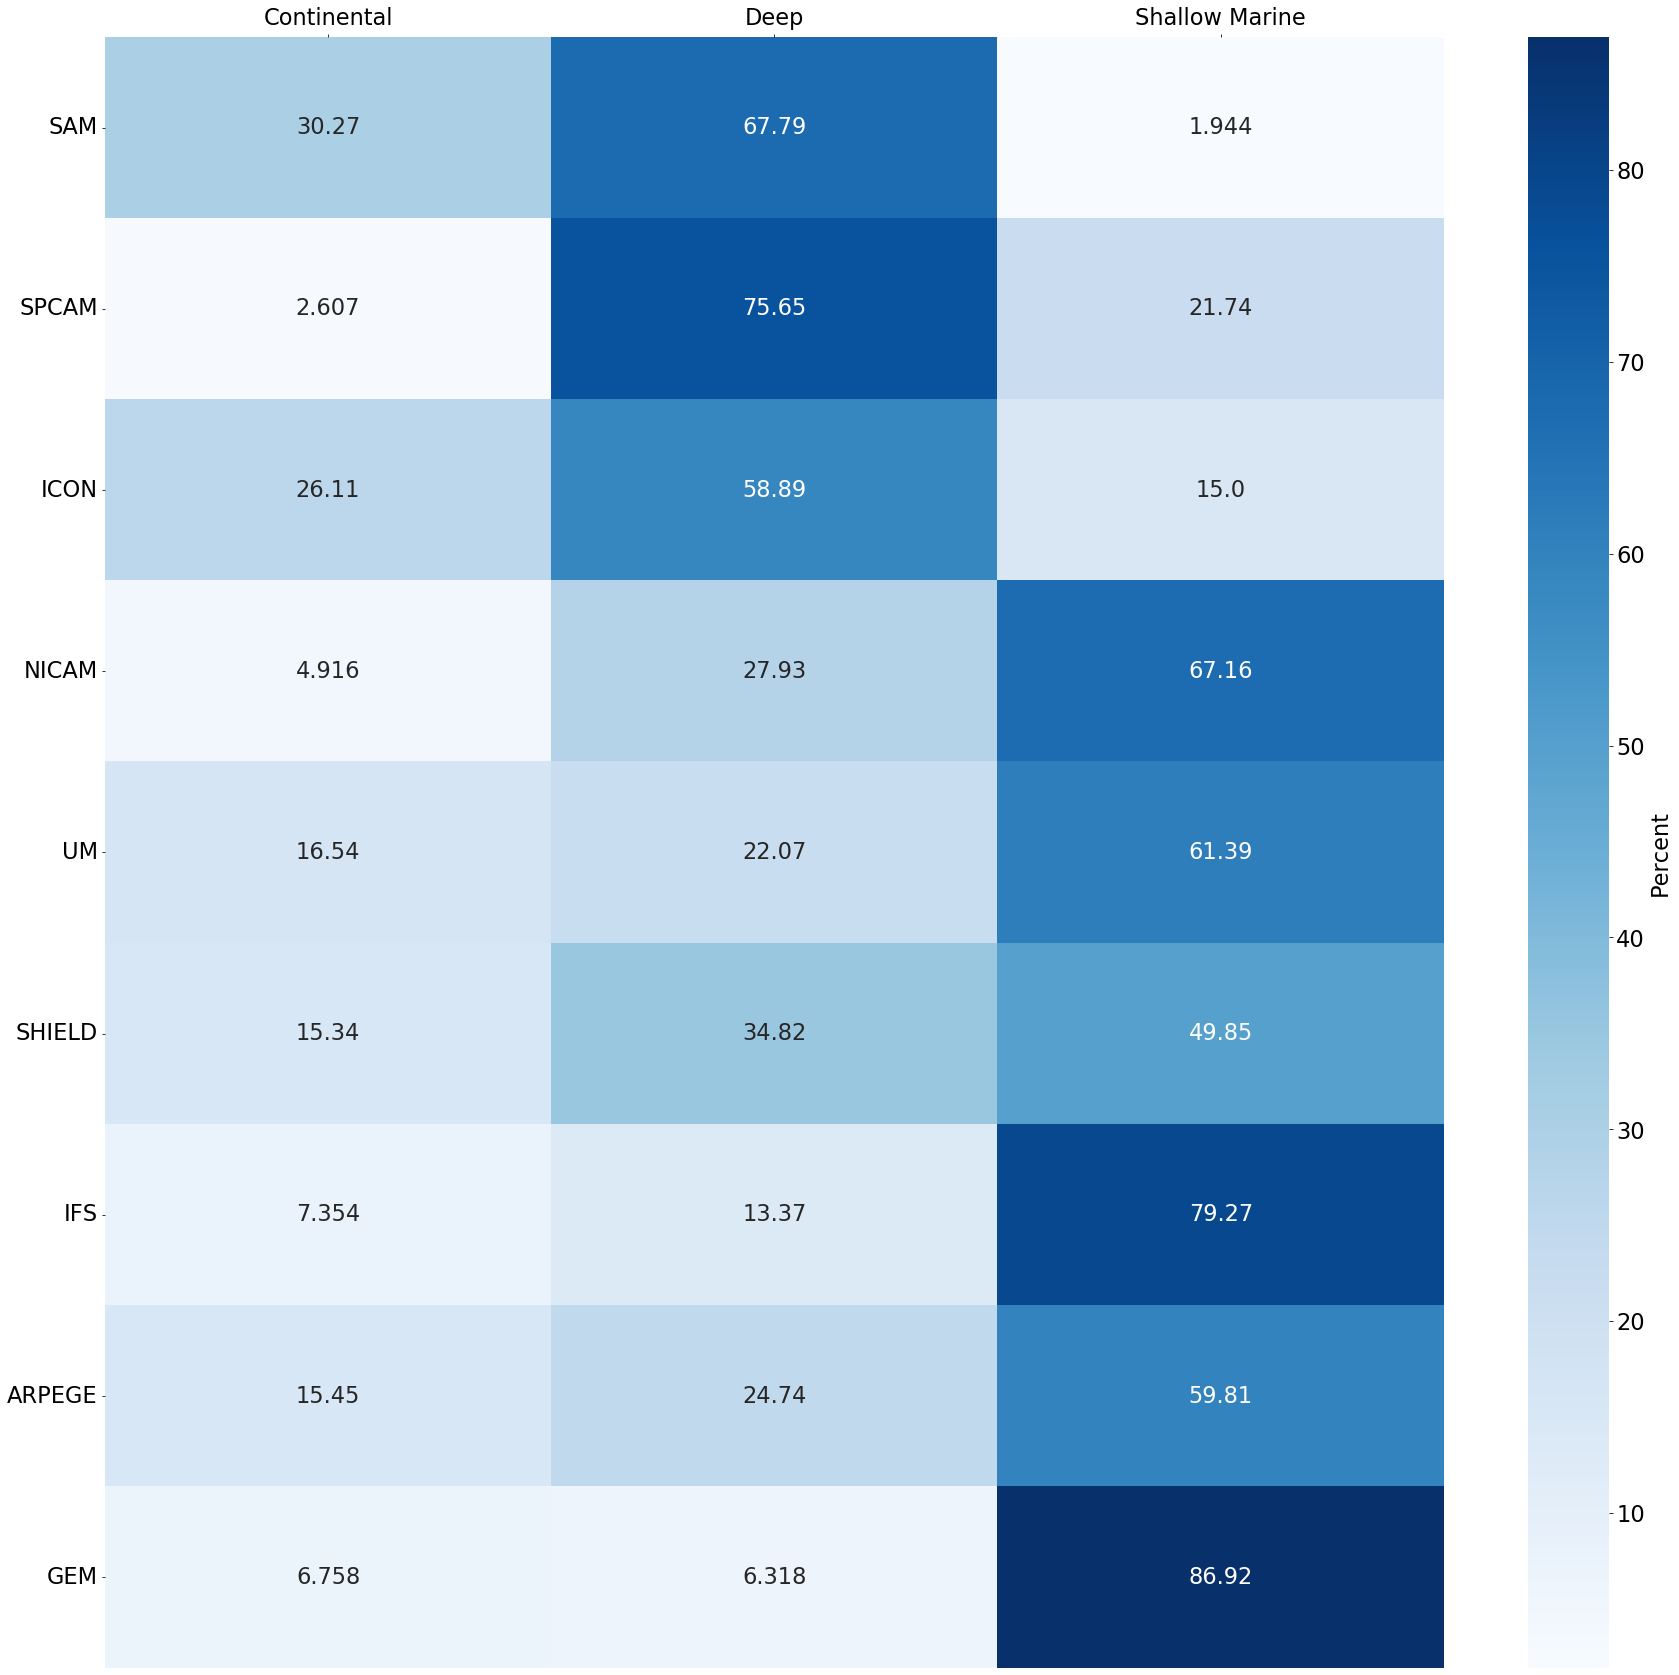

In [21]:
fig, ax = plt.subplots(figsize=(30,30))
models_y = ["SAM","SPCAM","ICON","NICAM","UM","SHIELD","IFS","ARPEGE","GEM"]
convections = ["Continental","Deep","Shallow Marine"]

labels = np.array2string(results, formatter={'float_kind':lambda x: "%.2f" % x})
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
#plt.ylabel("Y-axis ", rotation='horizontal')
sns.heatmap(results, annot=results, fmt="", cmap='Blues', ax=ax, yticklabels=list(models_y), xticklabels=list(convections), cbar_kws={'label': 'Percent'})
plt.yticks(rotation=0) 
print(" ")
plt.savefig("../Figures/Figure_S8.png", bbox_inches='tight',pad_inches = 0)
plt.savefig("../Figures/Figure_S8.pdf", bbox_inches='tight',pad_inches = 0)